In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [4]:
# Load data
data = Path('Resource/sampled_rideshare_ver2.csv')
df = pd.read_csv(data)
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,day_of_week,is_weekend
0,ad4dc1c8-74e4-4018-aefe-be4e4b8e1ee5,1969-12-31 19:00:01.545085210-05:00,22,17,12,2018-12-17 22:20:10,America/New_York,northeastern university,theatre district,uber,...,34.25,1545044400,41.35,1545076800,28.40,1545044400,35.88,1545076800,1,False
1,47547461-f88b-4c14-9920-1d4a79e7025f,1969-12-31 19:00:01.543366102-05:00,0,28,11,2018-11-28 00:48:22,America/New_York,northeastern university,theatre district,lyft,...,36.13,1543377600,46.83,1543320000,32.05,1543377600,43.85,1543320000,3,False
2,45fba16d-75f1-4e10-bbb7-614f7f1624ae,1969-12-31 19:00:01.543701476-05:00,21,1,12,2018-12-01 21:57:56,America/New_York,beacon hill,north end,uber,...,30.17,1543662000,44.11,1543690800,25.87,1543662000,43.44,1543690800,6,True
3,79ff5573-1bd4-406d-91c3-5e9b2b60d2b2,1969-12-31 19:00:01.544793612-05:00,13,14,12,2018-12-14 13:20:11,America/New_York,haymarket square,beacon hill,uber,...,27.18,1544781600,46.65,1544814000,24.51,1544785200,43.86,1544817600,5,False
4,80e33aa2-c291-41f0-b88d-adb3616bf154,1969-12-31 19:00:01.544851211-05:00,5,15,12,2018-12-15 05:20:11,America/New_York,north end,west end,lyft,...,39.54,1544929200,54.47,1544896800,36.46,1544929200,53.80,1544896800,6,True


In [3]:
# Pivot data to compare Uber and Lyft prices for the same trip
# df_pivot = df.pivot_table(index=['source', 'destination'], 
                        #   columns='cab_type', 
                        #   values='price')

# Create the target column (1 if Uber is cheaper, 0 if Lyft is cheaper)
# df_pivot['cheaper_service'] = (df_pivot['uber'] < df_pivot['lyft']).astype(int)

# Merge back to the original dataframe
# df = df.merge(df_pivot[['cheaper_service']], left_on=['timestamp', 'source', 'destination'], right_index=True)

# FOR THE CLASSIFIER

In [4]:
# Features and target
features = ['hour','day','month', 'source', 'destination','cab_type', 'name', 'temperature', 
            'distance', 'surge_multiplier', 'short_summary', 'surge_multiplier', 'is_weekend']
target = 'price'

X = df[features]
y = df[target]

In [5]:
# Turning strings into numbers for the model to understand
le = LabelEncoder()
X['name'] = le.fit_transform(X['name'])
X['is_weekend'] = le.fit_transform(X['is_weekend'])
X['source'] = le.fit_transform(X['source'])
X['destination'] = le.fit_transform(X['destination'])
X['cab_type'] = le.fit_transform(X['cab_type'])
mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(mapping)

X['short_summary'] = le.fit_transform(X['short_summary'])


C:\Users\vsanh\AppData\Local\Temp\ipykernel_39056\2557238214.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['name'] = le.fit_transform(X['name'])
C:\Users\vsanh\AppData\Local\Temp\ipykernel_39056\2557238214.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['is_weekend'] = le.fit_transform(X['is_weekend'])
C:\Users\vsanh\AppData\Local\Temp\ipykernel_39056\2557238214.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

{'lyft': 0, 'uber': 1}


C:\Users\vsanh\AppData\Local\Temp\ipykernel_39056\2557238214.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['short_summary'] = le.fit_transform(X['short_summary'])


In [6]:
# This was code for the previous classifier
# Apply SMOTE to balance the dataset
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y)

In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Scale numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Train Random Forest with class weight
# model = RandomForestClassifier(class_weight='balanced', n_estimators=200, max_depth=10, random_state=42)
# model.fit(X_train, y_train)

In [11]:
# # Define a metric function
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{name:<25} | R²: {r2:.3f} | RMSE: {rmse:.3f} | MAE: {mae:.3f}")

In [12]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    # "Support Vector Regressor": SVR(),
    "KNN Regressor": KNeighborsRegressor(),
    # "MLP Regressor": MLPRegressor(max_iter=500)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    evaluate_model(name, model, X_test, y_test)

Linear Regression         | R²: 0.507 | RMSE: 6.313 | MAE: 4.933
Decision Tree             | R²: 0.932 | RMSE: 2.339 | MAE: 1.289
Random Forest             | R²: 0.962 | RMSE: 1.758 | MAE: 1.068
KNN Regressor             | R²: 0.625 | RMSE: 5.505 | MAE: 4.044


In [13]:
from scipy.stats import skew, kurtosis

# Basic summary
price = df['price']
summary = price.describe()

print("🔍 Basic Stats:")
print(summary)
print("\n📏 Additional Info:")
print(f"Range: {price.max() - price.min():.2f}")
print(f"IQR (Interquartile Range): {price.quantile(0.75) - price.quantile(0.25):.2f}")
print(f"Skewness: {skew(price):.2f}")
print(f"Kurtosis: {kurtosis(price):.2f}")
print(f"Median: {price.median():.2f}")
print(f"Number of Unique Prices: {price.nunique()}")
print(f"Most Common Prices:\n{price.value_counts().head()}")
print(f"\nNulls: {price.isnull().sum()}")

# Percentiles
print("\n📊 Percentiles:")
for q in [0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]:
    print(f"{int(q*100)}th percentile: {price.quantile(q):.2f}")

🔍 Basic Stats:
count    138614.000000
mean         16.271483
std           8.977540
min           2.500000
25%           9.500000
50%          13.500000
75%          22.500000
max          92.000000
Name: price, dtype: float64

📏 Additional Info:
Range: 89.50
IQR (Interquartile Range): 13.00
Skewness: 1.15
Kurtosis: 1.65
Median: 13.50
Number of Unique Prices: 125
Most Common Prices:
price
13.5    17702
7.0     10608
16.5     8900
10.5     8165
9.0      6271
Name: count, dtype: int64

Nulls: 0

📊 Percentiles:
1th percentile: 3.50
5th percentile: 7.00
25th percentile: 9.50
50th percentile: 13.50
75th percentile: 22.50
95th percentile: 33.00
99th percentile: 42.50


In [14]:
models = {"Random Forest": RandomForestRegressor(n_estimators=100)}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    evaluate_model(name, model, X_test, y_test)

Random Forest             | R²: 0.962 | RMSE: 1.755 | MAE: 1.066


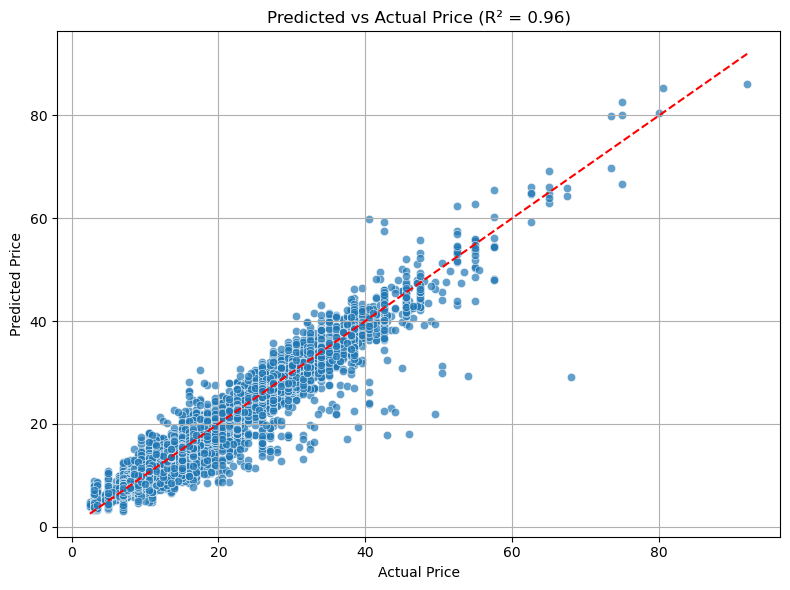

In [17]:
# Predict prices
y_pred = model.predict(X_test)

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(f"Predicted vs Actual Price (R² = {r2_score(y_test, y_pred):.2f})")
plt.grid(True)
plt.tight_layout()
plt.show()

In [27]:
# Fixing numpy Array issue for graph
og_feature = X.columns
X_train_df = pd.DataFrame(X_train, columns=og_feature)

             Feature  Importance
6               name    0.768613
8           distance    0.146355
11  surge_multiplier    0.020272
9   surge_multiplier    0.019802
5           cab_type    0.016148
7        temperature    0.008589
0               hour    0.005836
4        destination    0.003822
3             source    0.003596
1                day    0.003365
10     short_summary    0.002700
12        is_weekend    0.000529
2              month    0.000373


C:\Users\vsanh\AppData\Local\Temp\ipykernel_39056\750030301.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')


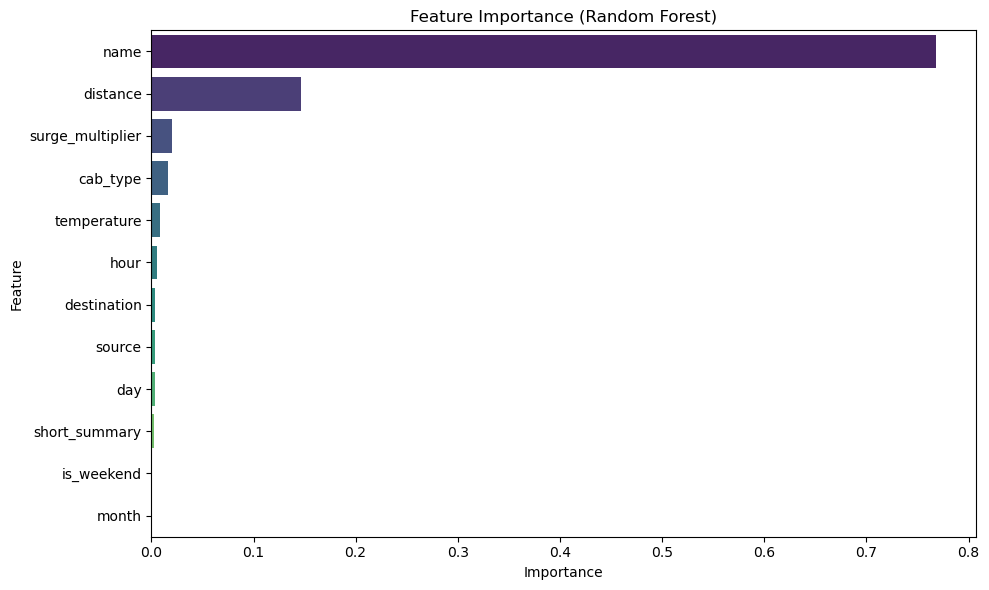

In [28]:
# Get feature importances
importances = model.feature_importances_
features = X_train_df.columns

# Create DataFrame
feat_imp_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display
print(feat_imp_df)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()

In [5]:
df['temperature'].min()


18.91

In [6]:
df['temperature'].max()

57.22

In [7]:
df['distance'].min()

0.02

In [8]:
df['distance'].max()

7.86

In [9]:
df['surge_multiplier'].min()

1.0

In [10]:
df['surge_multiplier'].max()

3.0

In [18]:
df['name'].unique()


array(['UberX', 'Lyft XL', 'Taxi', 'Lux', 'Black SUV', 'WAV', 'UberPool',
       'Shared', 'Lux Black XL', 'Lyft', 'UberXL', 'Black', 'Lux Black'],
      dtype=object)

In [20]:
df['source'].unique()

array(['northeastern university', 'beacon hill', 'haymarket square',
       'north end', 'boston university', 'fenway', 'financial district',
       'theatre district', 'south station', 'west end', 'back bay',
       'north station'], dtype=object)

In [21]:
df['destination'].unique()

array(['theatre district', 'north end', 'beacon hill', 'west end',
       'financial district', 'back bay', 'south station', 'fenway',
       'northeastern university', 'boston university', 'haymarket square',
       'north station'], dtype=object)